#**Data Read**

In [ ]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 6.5 MB/s eta 0:00:00


In [ ]:
# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
import re
import string

# NLTK setup
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

Mounted at /content/drive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Load the data
path_true = '/content/drive/MyDrive/DM/True.csv'
path_fake = '/content/drive/MyDrive/DM/Fake.csv'
df_true = pd.read_csv(path_true)
df_fake = pd.read_csv(path_fake)

# Add labels
df_true['label'] = 1
df_fake['label'] = 0

# Combine datasets
df = pd.concat([df_true, df_fake], ignore_index=True)
df.dropna(inplace=True)  # Drop missing values


# **PreProcess**

In [ ]:
# Show the structure and a few examples
print(df.head())
print("\nDataset Info:")
print(df.info())

# Check for class balance
print("\nLabel Distribution:")
print(df['label'].value_counts())


                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  label  
0  December 31, 2017       1  
1  December 29, 2017       1  
2  December 31, 2017       1  
3  December 30, 2017       1  
4  December 29, 2017       1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Ran

In [ ]:
# Check missing values in each column
print("\nMissing values per column:")
print(df.isnull().sum())

# Drop rows where title or text is missing
df.dropna(subset=['title', 'text'], inplace=True)



Missing values per column:
title      0
text       0
subject    0
date       0
label      0
dtype: int64


In [ ]:
# Remove exact duplicate rows if any
initial_shape = df.shape
df.drop_duplicates(subset=['title', 'text'], inplace=True)
print(f"\nRemoved {initial_shape[0] - df.shape[0]} duplicate rows.")
print(initial_shape[0])
print(df.shape[0])


Removed 5793 duplicate rows.
44898
39105


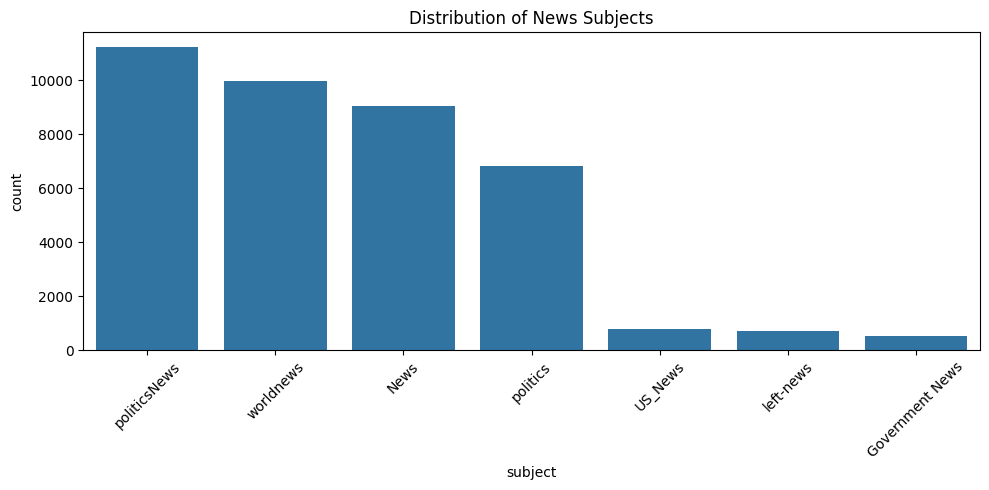

In [ ]:

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='subject', order=df['subject'].value_counts().index)
plt.title("Distribution of News Subjects")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
!pip install contractions
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 8.9 MB/s eta 0:00:00


In [ ]:
import contractions
import emoji

def clean_text_advanced(text):
    text = str(text).lower()
    text = contractions.fix(text)  # Expand contractions
    text = emoji.replace_emoji(text, '')  # Remove emojis
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\w*\d\w*', '', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 1]
    return " ".join(tokens)

# Apply to both columns
df['clean_title'] = df['title'].apply(clean_text_advanced)
df['clean_text'] = df['text'].apply(clean_text_advanced)
df['combined_text'] = df['clean_title'] + ' ' + df['clean_text']



In [ ]:
print("Final dataset shape:", df.shape)
df.head()


Final dataset shape: (39105, 8)


,title,text,subject,date,label,clean_title,clean_text,combined_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,yous budget fight loom republican flip fiscal ...,washington reuters head conservative republica...,yous budget fight loom republican flip fiscal ...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,yous military accept transgender recruit monda...,washington reuters transgender people allowed ...,yous military accept transgender recruit monda...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,senior yous republican senator let mr mueller job,washington reuters special counsel investigati...,senior yous republican senator let mr mueller ...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,fbi russia probe helped australian diplomat ti...,washington reuters trump campaign adviser geor...,fbi russia probe helped australian diplomat ti...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,trump want postal service charge much amazon s...,seattlewashington reuters president donald tru...,trump want postal service charge much amazon s...


# **Plot**

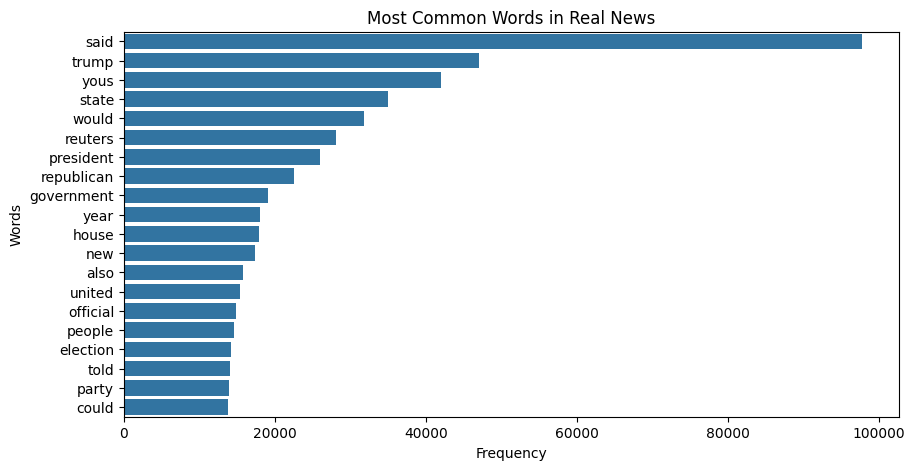

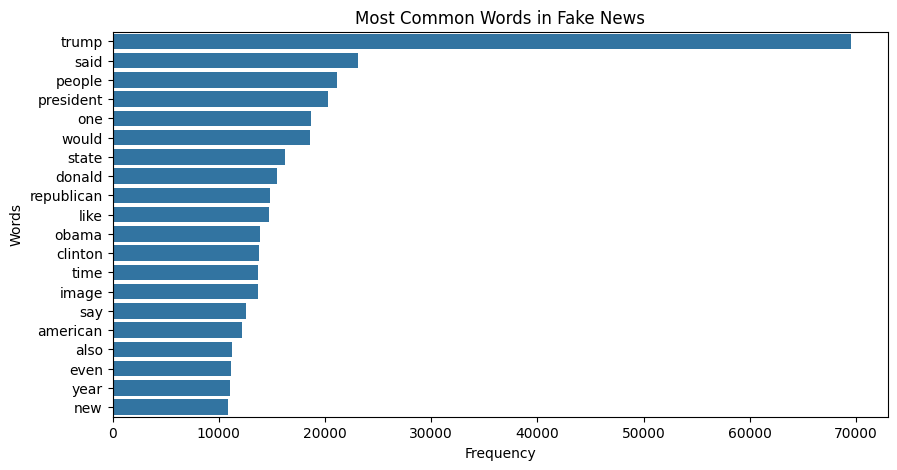

In [ ]:
from collections import Counter

def plot_most_common_words(corpus, title, n=20):
    words = ' '.join(corpus).split()
    common = Counter(words).most_common(n)
    words, freqs = zip(*common)
    plt.figure(figsize=(10,5))
    sns.barplot(x=list(freqs), y=list(words))
    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.show()

plot_most_common_words(df[df['label'] == 1]['combined_text'], "Most Common Words in Real News")
plot_most_common_words(df[df['label'] == 0]['combined_text'], "Most Common Words in Fake News")


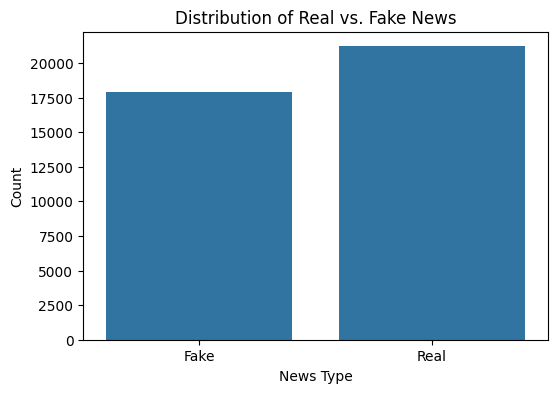

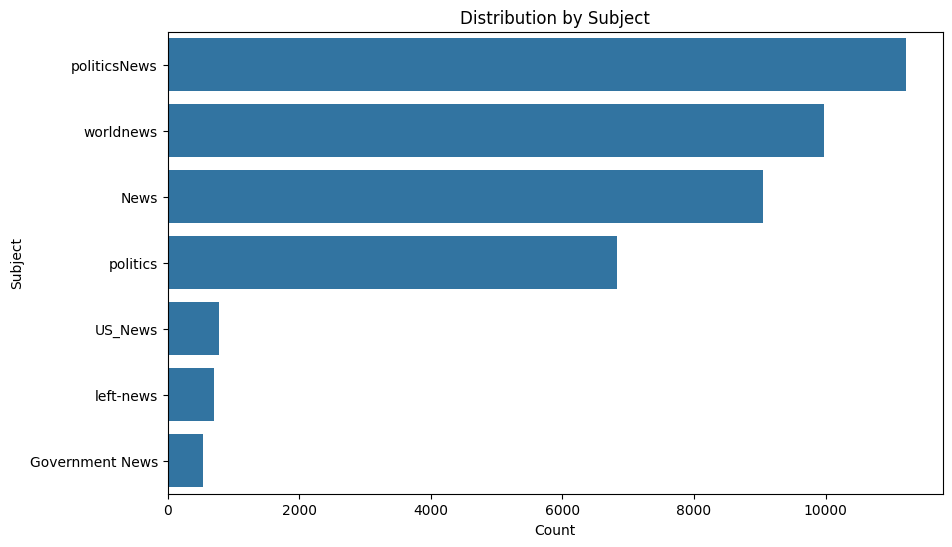

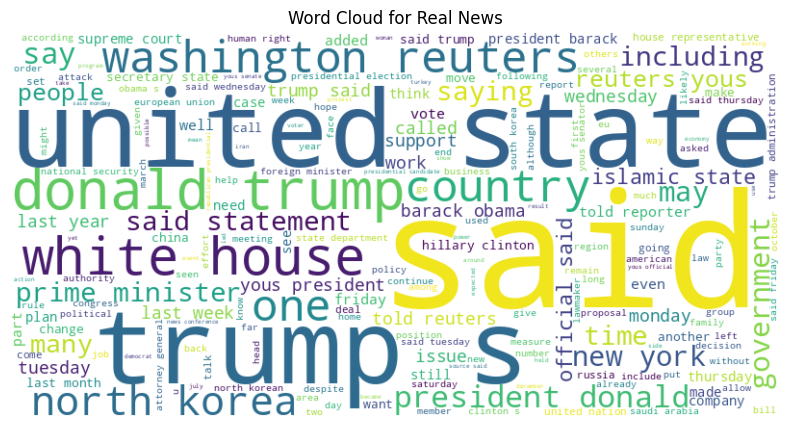

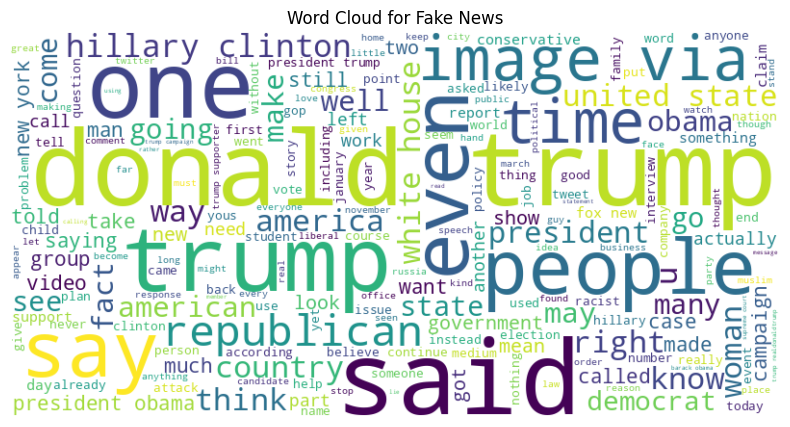

In [ ]:
# Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='label')
plt.title("Distribution of Real vs. Fake News")
plt.xticks([0, 1], ['Fake', 'Real'])
plt.xlabel("News Type")
plt.ylabel("Count")
plt.show()

# Subject distribution
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='subject', order=df['subject'].value_counts().index)
plt.title("Distribution by Subject")
plt.xlabel("Count")
plt.ylabel("Subject")
plt.show()

# Word Cloud for real news
real_words = ' '.join(df[df['label'] == 1]['combined_text'])
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_words)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Real News')
plt.show()

# Word Cloud for fake news
fake_words = ' '.join(df[df['label'] == 0]['combined_text'])
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_words)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Fake News')
plt.show()


# **New DF**

In [ ]:
new_df = pd.read_csv('/content/drive/MyDrive/DM/news_dataset.csv')
new_df.head()


,label,text
0,REAL,Payal has accused filmmaker Anurag Kashyap of ...
1,FAKE,A four-minute-long video of a woman criticisin...
2,FAKE,"Republic Poll, a fake Twitter account imitatin..."
3,REAL,"Delhi teen finds place on UN green list, turns..."
4,REAL,Delhi: A high-level meeting underway at reside...


In [ ]:
new_df.dropna(inplace=True)

new_df['clean_text'] = new_df['text'].apply(clean_text_advanced)
new_df['label'] = new_df['label'].apply(lambda x: 1 if x == 'REAL' else 0)
new_df.head()

,label,text,clean_text
0,1,Payal has accused filmmaker Anurag Kashyap of ...,payal accused filmmaker anurag kashyap behavin...
1,0,A four-minute-long video of a woman criticisin...,fourminutelong video woman criticising governm...
2,0,"Republic Poll, a fake Twitter account imitatin...",republic poll fake twitter account imitating a...
3,1,"Delhi teen finds place on UN green list, turns...",delhi teen find place un green list turn glass...
4,1,Delhi: A high-level meeting underway at reside...,delhi highlevel meeting underway residence raj...


# **Combination**

In [ ]:
import pandas as pd

# Load your original dataset
df1 = df[['combined_text', 'label']]
df1.dropna(inplace=True)


# Load Indian news dataset
df2 = new_df[['clean_text', 'label']]
df1 = df1.rename(columns={'combined_text': 'text'})
df2 = df2.rename(columns={'clean_text': 'text'})
# Combine
combined_df = pd.concat([df1[['text', 'label']], df2[['text', 'label']]], ignore_index=True)
combined_df.dropna(inplace=True)  # Now works as expected

# Shuffle
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)


<ipython-input-15-3576918018>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


In [ ]:
print(combined_df['text'].index.equals(combined_df['label'].index))
# If False, reset indices:
combined_df = combined_df.reset_index(drop=True)

True


In [ ]:
print(combined_df['label'].value_counts())
# Ensure labels are integers (0/1) or categorical, not floats/strings.


label
1    23047
0    19779
Name: count, dtype: int64


# **Logistic Regression**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pickle
from joblib import dump  # More reliable for sklearn objects

# Split FIRST to prevent data leakage
X_train_text, X_test_text, y_train, y_test = train_test_split(
    combined_df['text'],
    combined_df['label'],
    test_size=0.2,
    stratify=combined_df['label'],
    random_state=42
)

# 1. FIT the vectorizer on training data
tfidf = TfidfVectorizer(
    max_features=10000,  # Bigger vocab helps news
    ngram_range=(1, 2),  # Unigrams + bigrams = huge gain
    stop_words='english'  # Helps generalization by removing common words
)
X_train = tfidf.fit_transform(X_train_text)  # This learns the vocabulary and IDF
assert hasattr(tfidf, 'idf_'), "Vectorizer not fitted!"
assert len(tfidf.vocabulary_) == 10000, "Vocabulary size mismatch!"
# 2. IMMEDIATELY save the FITTED vectorizer
# In your training script

# After fitting the vectorizer
dump(tfidf, 'tfidf_vectorizer.joblib')  # Instead of pickle
# 3. Transform test data using the ALREADY-FITTED vectorizer
X_test = tfidf.transform(X_test_text)

# Continue with training
baseline_model = LogisticRegression(
    max_iter=1000,
    C=0.5,  # Stronger regularization
    penalty='l2',  # Default is L2, works well
    solver='liblinear'  # Works better on small-medium data
)
baseline_model.fit(X_train, y_train)

dump(baseline_model, 'baseline_model.joblib')
# Evaluation and model saving remains the same
y_pred = baseline_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.9826056502451552
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3956
           1       0.98      0.99      0.98      4610

    accuracy                           0.98      8566
   macro avg       0.98      0.98      0.98      8566
weighted avg       0.98      0.98      0.98      8566



# **DNN**

In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.2 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pickle
import numpy as np

# Split the data
X_train_text, X_test_text, y_train, y_test = train_test_split(
    combined_df['text'],
    combined_df['label'],
    test_size=0.2,
    stratify=combined_df['label'],
    random_state=42
)


# 1. Tokenize and pad sequences (correct)
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train_text)

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

X_train_seq = tokenizer.texts_to_sequences(X_train_text)
X_test_seq = tokenizer.texts_to_sequences(X_test_text)

max_len = 200  # Sequence length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

y_train = np.array(y_train)
y_test = np.array(y_test)


In [ ]:
'''!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip'''


--2025-06-12 17:41:27--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-06-12 17:41:27--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-06-12 17:41:27--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
ERROR: cannot verify downloads.cs.stanford.edu's certificate, issued by ‘CN=InCommon RSA Server CA 2,O=Internet2,C=US’:
 

In [ ]:
'''# Load GloVe embeddings
embedding_dim = 100
embedding_index = {}

# Download glove.6B.100d.txt beforehand (wget + unzip in Colab)
with open("glove.6B.100d.txt", encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coeffs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coeffs

print(f'Found {len(embedding_index)} word vectors.')

# Create embedding matrix
embedding_matrix = np.zeros((10000, embedding_dim))
word_index = tokenizer.word_index

for word, i in word_index.items():
    if i < 10000:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
'''

'# Load GloVe embeddings\nembedding_dim = 100\nembedding_index = {}\n\n# Download glove.6B.100d.txt beforehand (wget + unzip in Colab)\nwith open("glove.6B.100d.txt", encoding="utf8") as f:\n    for line in f:\n        values = line.split()\n        word = values[0]\n        coeffs = np.asarray(values[1:], dtype=\'float32\')\n        embedding_index[word] = coeffs\n\nprint(f\'Found {len(embedding_index)} word vectors.\')\n\n# Create embedding matrix\nembedding_matrix = np.zeros((10000, embedding_dim))\nword_index = tokenizer.word_index\n\nfor word, i in word_index.items():\n    if i < 10000:\n        embedding_vector = embedding_index.get(word)\n        if embedding_vector is not None:\n            embedding_matrix[i] = embedding_vector\n'

In [ ]:
model = models.Sequential([
    Input(shape=(max_len,)),  # e.g., max_len = 200
    layers.Embedding(input_dim=5000, output_dim=64),

    # Add Bidirectional LSTM
    layers.Bidirectional(layers.LSTM(64, return_sequences=True)),

    # Optionally keep the Conv1D
    layers.Conv1D(64, 5, activation='relu'),
    layers.GlobalMaxPooling1D(),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 200, 64)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 200, 128)       │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 196, 64)        │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_2          │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 429,185 (1.64 MB)

 Trainable params: 429,185 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
class callbackfunction(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      if logs['accuracy'] >= 0.9 or logs['val_accuracy'] >= 0.9:
        print("\nReached 95% accuracy so cancelling training!")
        self.model.stop_training = True


In [ ]:
# 3. Train
history = model.fit(
    X_train_pad,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_pad, y_test),
    verbose=1,
    callbacks=[callbackfunction()]
)

# 4. Save in modern .keras format
model.save('tf_text_classifier.keras')  # Avoids HDF5 warning

# 5. Evaluate
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Epoch 1/10
1071/1071 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.9054 - loss: 0.1980
Reached 95% accuracy so cancelling training!
1071/1071 ━━━━━━━━━━━━━━━━━━━━ 213s 196ms/step - accuracy: 0.9054 - loss: 0.1979 - val_accuracy: 0.9853 - val_loss: 0.0434
268/268 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step
Accuracy: 0.9852906840999299
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3956
           1       0.98      0.99      0.99      4610

    accuracy                           0.99      8566
   macro avg       0.99      0.98      0.99      8566
weighted avg       0.99      0.99      0.99      8566



# **DNN Plot**

In [ ]:
test_sentences = [
    "NASA confirms aliens have landed in Nevada desert.",
    "Scientists discover new treatment for cancer.",
    "Government to implement new tax reforms from July.",
    "Elon Musk to buy the moon in private space deal.",
    "India's GDP shows highest growth in past decade.",
    "Drinking 10 liters of water can cure COVID-19."
]

X_test_seq = tokenizer.texts_to_sequences(test_sentences)
X_test_pad = pad_sequences(X_test_seq, maxlen=200, padding='post')

y_pred = model.predict(X_test_pad)
y_pred_label = (y_pred > 0.5).astype("int32")

for text, pred, prob in zip(test_sentences, y_pred_label, y_pred):
    print(f"'{text}' → Predicted: {'REAL' if pred==1 else 'FAKE'} (prob={prob[0]:.2f})")


In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Training vs Validation')
plt.show()


In [ ]:
print(history.history.keys())
print(history.epoch)  # Should print something like: [0, 1, 2]


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
[0]


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay

# 1. Predict probabilities
y_pred_prob = model.predict(X_test_pad).ravel()  # Flatten in case it's a (n,1) shape

# 2. Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# 3. Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# 4. Plot ROC Curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# 5. Plot Precision-Recall Curve9999

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


ValueError: Found input variables with inconsistent numbers of samples: [8566, 6]

In [ ]:
from sklearn.metrics import classification_report

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))


In [ ]:
new_df.shape

# **BERT**

In [ ]:
!pip install -U transformers


In [ ]:
!pip install --upgrade transformers


In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_function(example):
    return tokenizer(example['text'], padding='max_length', truncation=True, max_length=256)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
from datasets import Dataset

dataset = Dataset.from_pandas(combined_df)
dataset = dataset.rename_columns({'text': 'text', 'label': 'labels'})

# Tokenize
tokenized_dataset = dataset.map(tokenize_function, batched=True)
tokenized_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])

# Split into train/test
train_test = tokenized_dataset.train_test_split(test_size=0.2, seed=42)


Map:   0%|          | 0/42826 [00:00<?, ? examples/s]

In [ ]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    eval_strategy="epoch",  # Note: "eval_strategy" instead of "evaluation_strategy"
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_test['train'],
    eval_dataset=train_test['test'],
)

trainer.train()

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

In [ ]:
'''preds = trainer.predict(train_test['test'])
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

y_pred = np.argmax(preds.predictions, axis=1)
y_true = preds.label_ids

print("Accuracy:", accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))
'''

In [ ]:
'''import matplotlib.pyplot as plt

# Example values — replace `old_acc`, `bert_acc` with your actual values
old_acc = 0.65  # from your previous LSTM+Conv1D model
bert_acc = accuracy_score(y_true, y_pred)

models = ['Old Model', 'BERT']
accuracies = [old_acc, bert_acc]

plt.bar(models, accuracies, color=['red', 'green'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()
'''

In [ ]:
'''!pip install transformers datasets

import torch
import numpy as np
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Use the pre-cleaned combined_text from previous processing (clean_title + clean_text)
# Ensure you have already run the data cleaning steps from the previous code

# Split the DataFrame into training and test sets with stratification
train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df['label']  # Maintain class distribution
)

# Create Hugging Face datasets
train_dataset = Dataset.from_pandas(train_df[['combined_text', 'label']])
test_dataset = Dataset.from_pandas(test_df[['combined_text', 'label']])

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenization function
def tokenize_function(example):
    return tokenizer(
        example["combined_text"],
        padding="max_length",
        truncation=True,
        max_length=256  # Optimal for news articles
    )

# Tokenize datasets
train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Format datasets for PyTorch
train_dataset = train_dataset.remove_columns(["combined_text"]).with_format("torch")
test_dataset = test_dataset.remove_columns(["combined_text"]).with_format("torch")

# Metric computation for evaluation
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='binary')
    acc = accuracy_score(labels, predictions)
    return {'accuracy': acc, 'f1': f1, 'precision': precision, 'recall': recall}

# Load BERT model
bert_model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=2,
    id2label={0: "Fake", 1: "True"},  # For interpretability
    label2id={"Fake": 0, "True": 1}
)

# Enhanced training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,  # Larger batch for evaluation
    learning_rate=2e-5,  # Standard for BERT fine-tuning
    warmup_steps=500,
    weight_decay=0.01,
    evaluation_strategy="epoch",  # Full evaluation each epoch
    logging_dir='./logs',
    logging_steps=50,
    load_best_model_at_end=True,  # For model selection
    metric_for_best_model='f1',  # Focus on F1-score
)

# Initialize Trainer with metrics
trainer = Trainer(
    model=bert_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
)

# Train and evaluate
trainer.train()
eval_results = trainer.evaluate()
print("Final Evaluation Results:", eval_results)

# Save model components
bert_model.save_pretrained("./bert_finetuned_news")
tokenizer.save_pretrained("./bert_finetuned_news")'''